In [1]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w7 - Geometric Transformations and Image Features\data"

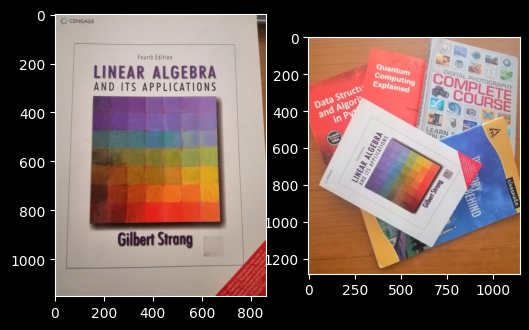

In [3]:
img1 = cv2.imread(DATA_PATH + "\\images\\book.jpeg")
img1Gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(DATA_PATH + "\\images\\book_scene.jpeg")
img2Gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(img1[:, :, ::-1])
plt.subplot(122)
plt.imshow(img2[:, :, ::-1])
plt.show()

In [20]:
orb = cv2.ORB_create()

keypoints1, description1 = orb.detectAndCompute(img1Gray, None)
keypoints2, description2 = orb.detectAndCompute(img2Gray, None)

## Find Matchs

In [21]:
BFMatches = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [22]:
matches = BFMatches.match(description1, description2)

matches = sorted(matches, key=lambda x: x.distance)

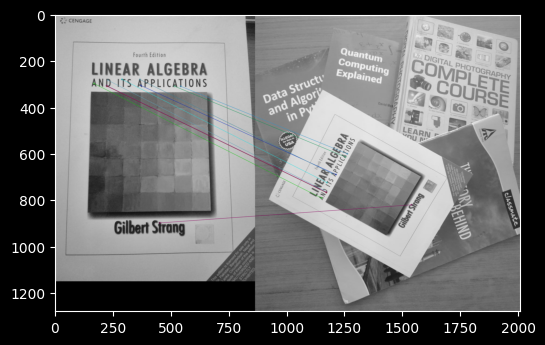

In [28]:
img3 = cv2.drawMatches(img1Gray, keypoints1, img2Gray, keypoints2,
                       matches[:10], None,
                       flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

## Descriptor Matcher

In [30]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

In [33]:
matches = matcher.match(description1, description2)
matches = sorted(matches, key=lambda x: x.distance)

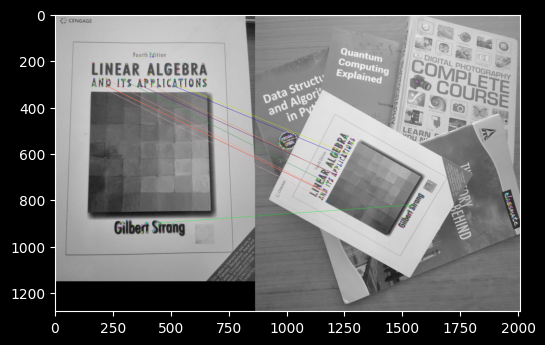

In [36]:
img3 = cv2.drawMatches(img1Gray, keypoints1, img2Gray, keypoints2,
                       matches[:10], None)

plt.imshow(img3)
plt.show()

## FLANN based Matcher

In [50]:
FLANN_INDEX = 1
index_params = dict(algorithm = FLANN_INDEX, trees = 5)
search_params = dict(checks = 50)

In [51]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [52]:
matches = flann.knnMatch(np.float32(description1),np.float32(description2), k = 2)

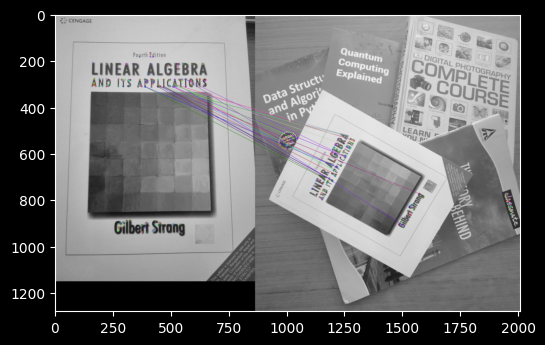

In [53]:
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

img3 = cv2.drawMatchesKnn(img1Gray,keypoints1,img2Gray,keypoints2,matches[:10],None)

plt.imshow(img3)
plt.show()